In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

pd.plotting.register_matplotlib_converters()
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
model_list = [LinearRegression(), Perceptron(), SVR(kernel='rbf'),
             SGDRegressor(), AdaBoostRegressor(), BaggingRegressor(), 
              RandomForestRegressor(n_estimators=100), GradientBoostingRegressor(),
             MLPRegressor()]
def model_iter(X, y, model_list, test_frac):
    X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=test_frac, random_state=42)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s = scaler.transform(X_test)
    for regr in model_list:
        regr_init = regr
        regr_init.fit(X_train_s, y_train)
        y_pred = regr_init.predict(X_test_s)
        print('Mean squared error for model {} is : {:.2f}\n'.format(regr,mean_squared_error(y_test, y_pred)))

In [3]:
FILE_PATH = "/home/neo/Documents/Projects/melbourne housing/"
df_melbourne = pd.read_csv(FILE_PATH + "Melbourne_housing_FULL.csv")

In [5]:
df_melbourne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [37]:
df_melb_num = df_melbourne.select_dtypes(exclude=['object'])

In [38]:
df_melb_num.isnull().mean()

Rooms            0.000000
Price            0.218321
Distance         0.000029
Postcode         0.000029
Bedroom2         0.235735
Bathroom         0.235993
Car              0.250394
Landsize         0.338813
BuildingArea     0.605761
YearBuilt        0.553863
Lattitude        0.228821
Longtitude       0.228821
Propertycount    0.000086
dtype: float64

In [39]:
df_melb_num_nna = df_melb_num.dropna(axis=0)    

In [33]:
df_melb_num_nna.columns

Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Lattitude', 'Longtitude', 'Propertycount', 'Price'], dtype='object')

In [34]:
features_x = ['Rooms', 'Distance', 'Postcode', 
            'Bedroom2', 'Bathroom', 'Car', 'Landsize', 
            'Lattitude', 
            'Longtitude', 'Propertycount']
model_list_x = [BaggingRegressor(), 
              RandomForestRegressor(n_estimators=100), 
                GradientBoostingRegressor()]
X = df_melb_num_nna[features_x]
y = df_melb_num_nna.Price
model_iter(X,y, model_list_x,0.3)

Mean squared error for model BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False) is : 94786940120.27

Mean squared error for model RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) is : 91899702435.26

Mean squared error for model GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
   

In [35]:
model_list_x = [BaggingRegressor(n_estimators=100), 
              RandomForestRegressor(n_estimators=300), 
                GradientBoostingRegressor(n_estimators=300)]
model_iter(X,y, model_list_x,0.3)

Mean squared error for model BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=100,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False) is : 91544643243.44

Mean squared error for model RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) is : 90519786612.96

Mean squared error for model GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
  

### Missing values in features is making up for a large part of it, we are losing about 20% of data data due to it

# EDA - For identifying best imputation methodology

In [77]:
df_melbourne = df_melbourne[df_melbourne['Price'].notna()]
df_melbourne.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


In [78]:
df_melbourne.isnull().mean()

Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.000000
Method           0.000000
SellerG          0.000000
Date             0.000000
Distance         0.000037
Postcode         0.000037
Bedroom2         0.236393
Bathroom         0.236613
Car              0.250450
Landsize         0.340037
BuildingArea     0.608911
YearBuilt        0.556502
CouncilArea      0.000110
Lattitude        0.229530
Longtitude       0.229530
Regionname       0.000110
Propertycount    0.000110
dtype: float64

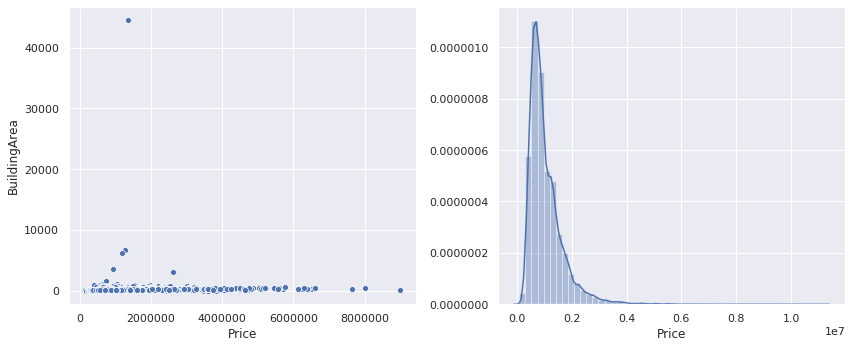

In [79]:
# Lets start with the most sparse feature, 'BuildingArea'
sns.set(style="darkgrid")

fig, ax =plt.subplots(1,2, figsize = (12,5))

sns.relplot(x="Price", y="BuildingArea", data=df_melbourne, ax = ax[0])
sns.distplot(df_melbourne.Price.dropna(), ax = ax[1])
fig.tight_layout()
plt.close(2)
plt.close(3)
plt.show()

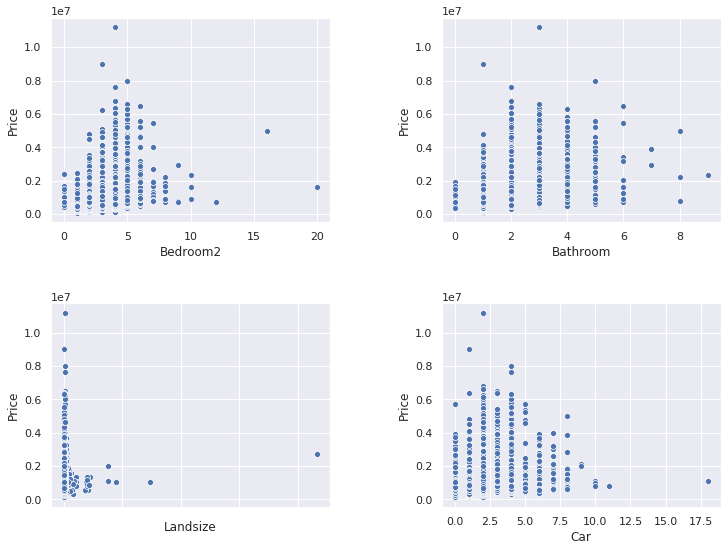

In [81]:
fig = plt.figure(figsize=(12,9))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.relplot(x="Bedroom2", y="Price", data=df_melbourne, ax = ax)
ax = fig.add_subplot(2, 2, 2)
sns.relplot(x="Bathroom", y="Price", data=df_melbourne, ax = ax)
ax = fig.add_subplot(2, 2, 3)
sns.relplot(x="Landsize", y="Price", data=df_melbourne, ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax = fig.add_subplot(2, 2, 4)
sns.relplot(x="Car", y="Price", data=df_melbourne, ax = ax)
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.show()

## Intuition based imputation and elimination

Distance         0.000037   Drop rows
Postcode         0.000037   Drop rows
Bedroom2         0.236393   Impute with mode
Bathroom         0.236613   Impute with mode
Car              0.250450   Mode
Landsize         0.340037   Drop column
BuildingArea     0.608911   Drop column
YearBuilt        0.556502   Drop column
CouncilArea      0.000110   Impute with mode
Lattitude        0.229530   Impute with mode
Longtitude       0.229530   Impute with mode
Regionname       0.000110   Impute with mode
Propertycount    0.000110   Impute with median

In [107]:
df_melbourne.Bathroom.nunique()

6

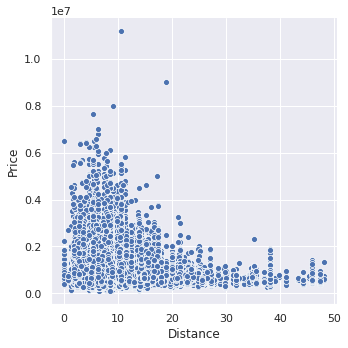

In [89]:
sns.relplot(x="Distance", y="Price", data=df_melbourne)

In [93]:
# ranges of house prices
for q in [.25,.5,.75, .9, .95, .99, .999]:
    print("{} percentile value of price : {};\t houses : {}".format(q,
                                                                    df_melbourne.Price.quantile(q),
                                                                    len(df_melbourne[df_melbourne.Price>= df_melbourne.Price.quantile(q)])))

0.25 percentile value of price : 635000.0;	 houses : 20495
0.5 percentile value of price : 870000.0;	 houses : 13712
0.75 percentile value of price : 1295000.0;	 houses : 6822
0.9 percentile value of price : 1800000.0;	 houses : 2793
0.95 percentile value of price : 2250000.0;	 houses : 1364
0.99 percentile value of price : 3400540.000000001;	 houses : 273
0.999 percentile value of price : 5595080.000000089;	 houses : 28


In [94]:
df_melbourne = df_melbourne[df_melbourne.Price>= df_melbourne.Price.quantile(q)]

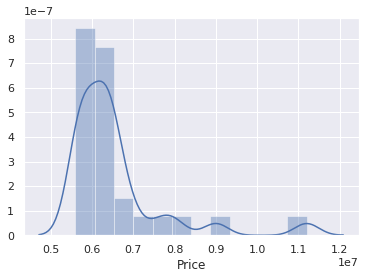

In [95]:
sns.distplot(df_melbourne.Price)

In [96]:
# droping rows and columns

#drop rows 
rows_drop = ['Distance','Postcode']
for col in rows_drop:
    df_melb_eda = df_melbourne[df_melbourne[col].notna()]
# drops cols
cols_drop = ['Landsize','BuildingArea','YearBuilt']
df_melb_eda.drop(columns = cols_drop,
                inplace=True)

In [104]:
df_melb_eda.mode()['Lattitude'][0]

-37.93168

In [111]:
# Imputing with mode 
mode_cols = ['Car','Bedroom2','Bathroom','CouncilArea',
            'Lattitude','Longtitude','Regionname']
for col in mode_cols:
    df_melb_eda[col] = df_melb_eda[col].fillna(df_melb_eda.mode()[col][0])

In [115]:
X = df_melb_eda.drop(columns='Price')
X = X.select_dtypes(exclude ='object') 
y = df_melb_eda.Price
model_list_x = [BaggingRegressor(n_estimators=100), 
              RandomForestRegressor(n_estimators=300), 
                GradientBoostingRegressor(n_estimators=300)]
model_iter(X,y, model_list_x,0.3)

Mean squared error for model BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=100,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False) is : 478828447544.44

Mean squared error for model RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) is : 494546981060.49

Mean squared error for model GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,


In [ ]:
# Conclusion 